In [13]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [10]:
file_path = '/data/ana/CosmicRay/Anisotropy/IceTop/ITpass2/l3_data_run_config_2011_year_2011_0610.root'
with uproot.open(file_path) as f:
    print("File contents:", f.keys())
    event_header = f['I3EventHeader']
    print(event_header.keys())
    event_times = event_header["time_start_mjd"].array(library='np')

File contents: ['LaputopSmallParams;4', 'LaputopSmallParams;3', 'LaputopParams;3', 'LaputopParams;2', 'Laputop;2', 'Laputop;1', 'LaputopSmall;2', 'LaputopSmall;1', 'I3EventHeader;1', 'IT73AnalysisIceTopQualityCuts;1', 'NStations;1', 'QFilterMask;1', 'MasterTree;1']
['Run', 'Event', 'SubEvent', 'SubEventStream', 'SubEventStream_String', 'exists', 'time_start_utc_daq', 'time_start_mjd', 'time_end_utc_daq', 'time_end_mjd']


Suggested path:
- load event time (shouldn't matter which you pick) as an array
- find the time gaps by looking at the difference in event time between adjacent events
- plot a histogram of those time gaps

In [35]:
dt = event_times[1:] - event_times[:-1]

In [40]:
# Eliminate zeros so we can see the log space
dt = dt[dt != 0]

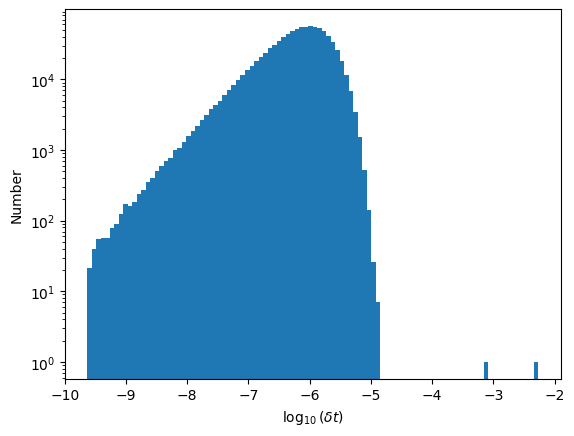

In [42]:
fig, ax = plt.subplots()
ax.hist(np.log10(dt), bins=100, log=True)
ax.set_ylabel('Number')
ax.set_xlabel(r'$\log_{10}(\delta t)$')
plt.show()

Next steps:
- need to be able to apply this approach to multiple files
- careful: don't do the histogram through maptlotlib (_especially_ don't do it with free-floating bins)
    - define the bins in advance (suggest: np.linspace)
    - use np.histogram to calculate values you want
- hardest part: dealing with dt's between files

In [4]:
import uproot
import numpy as np
file_path = '/data/ana/CosmicRay/Anisotropy/IceTop/ITpass2/l3_data_run_config_2011_year_2011_0611.root'
with uproot.open(file_path) as f:
    print("File contents:", f.keys())
    event_header = f['I3EventHeader']
    print(event_header.keys())
    time_of_events = event_header["time_start_mjd"].array(library='np')

File contents: ['LaputopSmallParams;4', 'LaputopSmallParams;3', 'LaputopParams;3', 'LaputopParams;2', 'Laputop;2', 'Laputop;1', 'LaputopSmall;2', 'LaputopSmall;1', 'I3EventHeader;1', 'IT73AnalysisIceTopQualityCuts;1', 'NStations;1', 'QFilterMask;1', 'MasterTree;1']
['Run', 'Event', 'SubEvent', 'SubEventStream', 'SubEventStream_String', 'exists', 'time_start_utc_daq', 'time_start_mjd', 'time_end_utc_daq', 'time_end_mjd']


In [5]:
max(time_of_events)

55724.1494237118

In [60]:
min(time_of_events)

55723.14789528352

In [12]:
import uproot
import numpy as np
file_path = '/data/ana/CosmicRay/Anisotropy/IceTop/ITpass2/l3_data_run_config_2011_year_2011_0611.root'
with uproot.open(file_path) as f:
    print("File contents:", f.keys())
    event_header = f['I3EventHeader']
    print(event_header.keys())
    time_of_events = event_header["time_start_mjd"].array(library='np')
start_value = 55723.14789528352
end_value = 55724.1494237118
number_of_bins = 100
bin_edges = np.linspace(start_value, end_value, number_of_bins + 1)
print(f"Bin Edges: {bin_edges}")
counts, edges = np.histogram(time_of_events, bins=bin_edges)
print(f"\nCounts per bin: {counts}")
print(f"Edges: {edges}")

File contents: ['LaputopSmallParams;4', 'LaputopSmallParams;3', 'LaputopParams;3', 'LaputopParams;2', 'Laputop;2', 'Laputop;1', 'LaputopSmall;2', 'LaputopSmall;1', 'I3EventHeader;1', 'IT73AnalysisIceTopQualityCuts;1', 'NStations;1', 'QFilterMask;1', 'MasterTree;1']
['Run', 'Event', 'SubEvent', 'SubEventStream', 'SubEventStream_String', 'exists', 'time_start_utc_daq', 'time_start_mjd', 'time_end_utc_daq', 'time_end_mjd']
Bin Edges: [55723.14789528 55723.15791057 55723.16792585 55723.17794114
 55723.18795642 55723.1979717  55723.20798699 55723.21800227
 55723.22801756 55723.23803284 55723.24804813 55723.25806341
 55723.26807869 55723.27809398 55723.28810926 55723.29812455
 55723.30813983 55723.31815512 55723.3281704  55723.33818568
 55723.34820097 55723.35821625 55723.36823154 55723.37824682
 55723.38826211 55723.39827739 55723.40829267 55723.41830796
 55723.42832324 55723.43833853 55723.44835381 55723.4583691
 55723.46838438 55723.47839966 55723.48841495 55723.49843023
 55723.50844552 5